<a href="https://colab.research.google.com/github/sethkipsangmutuba/Deep-Learning/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning

We aim to model the relationship between a response variable $y$ and predictor(s) $x$. This involves two main challenges:

1. Difficult to build a model from first principles  
2. Easy to collect large amounts of data ($x$, $y$)

---

### Why Machine Learning?

Machine learning automatically learns a predictive model from data:

$$
y = h_\theta(x)
$$

- $\theta$: parameters learned from data  
- $x$ and $y$: typically vectors  
- Additional settings (e.g., polynomial degree, regularization) are **hyperparameters**


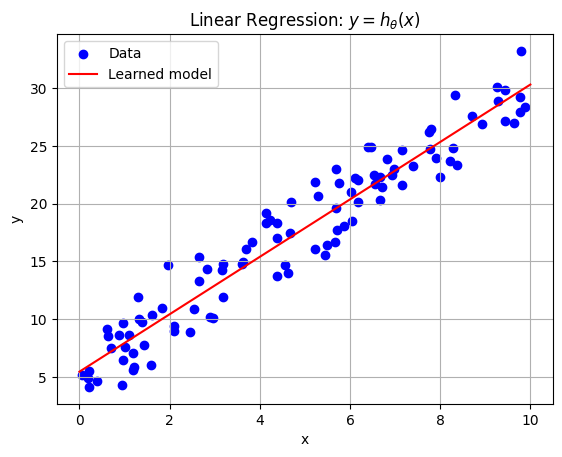

Learned parameters: θ0 (intercept) = 5.44, θ1 (slope) = 2.49


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Sample data
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # Predictor x
y = 2.5 * x + 5 + np.random.randn(100, 1) * 2  # Response y with noise

# Linear Regression model: y = hθ(x)
model = LinearRegression()
model.fit(x, y)

# Predictions
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(x_plot)

# Plot
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x_plot, y_pred, color='red', label='Learned model')
plt.title('Linear Regression: $y = h_\\theta(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print learned parameters θ
print(f"Learned parameters: θ0 (intercept) = {model.intercept_[0]:.2f}, θ1 (slope) = {model.coef_[0][0]:.2f}")


**Interpretation:**

- $\theta_0$ (intercept) ≈ **5.44**: This is the model's estimated baseline when $x = 0$
- $\theta_1$ (slope) ≈ **2.49**: This is the estimated rate of change in $y$ for each unit increase in $x$

Despite random noise, the model recovered parameters close to the true values (**5** and **2.5**), illustrating how **machine learning can infer a model from data** without needing to hard-code equations.


### Canonical Machine Learning: Optimization Problem

In supervised machine learning, we are given:

- A **training dataset** of input-output pairs:  
  $(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)$  
- A **hypothesis function**: $h_\theta(x)$, which makes predictions  
- A **new input** $x$ for which we want to predict $\hat{y} = h_\theta(x)$

---

### Objective: Learn Optimal Parameters $\theta$

We want to find parameters $\theta$ that minimize the prediction error over the training data:

$$
\min_\theta \sum_{i=1}^m \mathcal{L}(\hat{y}, y) \equiv \min_\theta \sum_{i=1}^m \mathcal{L}(h_\theta(x_i), y_i)
$$

Where:
- $\mathcal{L}$ is a **loss function** measuring the error between prediction $\hat{y}$ and actual label $y$  
- The goal is to minimize this total loss over all training examples

---

### Key Components of Any ML Algorithm

To define and solve the optimization, every ML algorithm needs:

1. **Hypothesis function** $h_\theta(x)$  
   - Defines how predictions are made from inputs  
2. **Loss function** $\mathcal{L}(\hat{y}, y)$  
   - Measures how far predictions are from actual outcomes  
3. **Optimization method**  
   - The algorithm used to adjust $\theta$ to minimize total loss (e.g., gradient descent)


### Canonical Machine Learning Optimization (Gradient Descent for Linear Regression)

This walkthrough demonstrates how a machine learning model learns parameters $\theta$ by minimizing a loss function using gradient descent.

---

### 1. **Synthetic Training Data**
We generate a dataset where the true relationship between input $x$ and output $y$ is:

$$
y = 3x + 2 + \text{noise}
$$

This simulates real-world data with some randomness.

---

### 2. **Hypothesis Function**
The model predicts outputs using:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

This is a simple linear function. The goal is to learn the best values of $\theta_0$ and $\theta_1$.

---

### 3. **Loss Function: Mean Squared Error (MSE)**
To evaluate how well the model fits the data, we use the MSE loss:

$$
\mathcal{L}(h_\theta(x), y) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2
$$

This measures the average squared difference between predictions and actual values.

---

### 4. **Gradient Computation**
The gradients of the loss with respect to $\theta_0$ and $\theta_1$ are calculated to determine how to update the parameters:

- $\frac{\partial \mathcal{L}}{\partial \theta_0}$
- $\frac{\partial \mathcal{L}}{\partial \theta_1}$

---

### 5. **Optimization via Gradient Descent**
We start with initial guesses for $\theta$, then iteratively update them using:

$$
\theta := \theta - \alpha \nabla_\theta \mathcal{L}
$$

Where:
- $\alpha$ is the **learning rate**
- $\nabla_\theta \mathcal{L}$ is the gradient vector

This minimizes the loss function over time.

---

### 6. **Visual Output**
Two side-by-side plots help illustrate the learning process:
- **Left plot**: Loss decreases over training epochs, showing convergence.
- **Right plot**: Final learned line fitted to the training data points.

---


This implementation illustrates the canonical machine learning pipeline:
- A **hypothesis function** $h_\theta(x)$
- A **loss function** $\mathcal{L}(\hat{y}, y)$
- An **optimization algorithm** to find optimal $\theta$

The model successfully learns parameters close to the true values, demonstrating how machine learning solves an optimization problem.


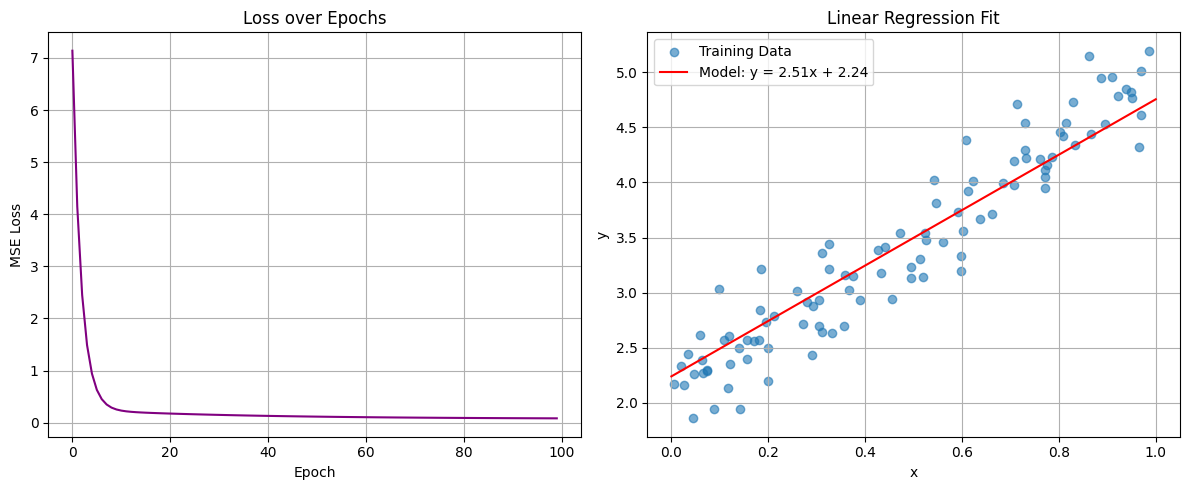

Optimized parameters: θ0 = 2.24, θ1 = 2.51


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic training data
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + 2 + np.random.randn(100, 1) * 0.3  # true: y = 3x + 2 + noise

# Hypothesis function: hθ(x) = θ0 + θ1 * x
def predict(x, theta):
    return theta[0] + theta[1] * x

# Loss function: Mean Squared Error
def compute_loss(x, y, theta):
    y_pred = predict(x, theta)
    return np.mean((y_pred - y) ** 2)

# Gradient of the loss function
def compute_gradients(x, y, theta):
    y_pred = predict(x, theta)
    error = y_pred - y
    d_theta0 = 2 * np.mean(error)
    d_theta1 = 2 * np.mean(error * x)
    return np.array([d_theta0, d_theta1])

# Gradient Descent optimizer
def gradient_descent(x, y, lr=0.1, epochs=100):
    theta = np.zeros(2)  # initial θ0, θ1
    loss_history = []

    for epoch in range(epochs):
        gradients = compute_gradients(x, y, theta)
        theta -= lr * gradients
        loss = compute_loss(x, y, theta)
        loss_history.append(loss)

    return theta, loss_history

# Train the model
theta_opt, loss_hist = gradient_descent(x, y)

# Prepare data for plotting
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)
y_plot = predict(x_plot, theta_opt)

# Plot side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Loss over epochs
axs[0].plot(loss_hist, color='purple')
axs[0].set_title("Loss over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE Loss")
axs[0].grid(True)

# Plot 2: Regression line
axs[1].scatter(x, y, label='Training Data', alpha=0.6)
axs[1].plot(x_plot, y_plot, color='red', label=f'Model: y = {theta_opt[1]:.2f}x + {theta_opt[0]:.2f}')
axs[1].set_title("Linear Regression Fit")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Optimized parameters: θ0 = {theta_opt[0]:.2f}, θ1 = {theta_opt[1]:.2f}")


### Least Squares Regression

**Least Squares** is one of the simplest and most foundational methods in supervised learning, particularly for regression problems.

---

### Hypothesis Function

We model the relationship between input $x$ and output $y$ using a linear function:

$$
h_\theta(x) = \theta_1 x + \theta_2
$$

- $\theta_1$ is the **slope**
- $\theta_2$ is the **intercept**

This function tries to predict $y$ for a given $x$ using parameters $\theta = (\theta_1, \theta_2)$.

---

### 🔸 Loss Function: Squared Error

To measure how well our model fits the data, we use the **squared loss** for each data point:

$$
\mathcal{L}(\hat{y}, y) = (\hat{y} - y)^2
$$

Over the entire dataset of $m$ training examples $(x_i, y_i)$, the **total loss** becomes:

$$
J(\theta) = \sum_{i=1}^m (h_\theta(x_i) - y_i)^2
$$

This is also called the **L2 loss** or **mean squared error (MSE)** (if divided by $m$).

---

### Optimization: Analytical L2-Norm Solution

Least Squares Regression has a **closed-form solution** — we can compute the optimal parameters $\theta$ directly using linear algebra:

$$
\theta = (X^T X)^{-1} X^T y
$$

Where:
- $X$ is the **design matrix** (with a column of 1s for intercept)
- $y$ is the vector of target values
- $\theta$ is the vector of parameters $[\theta_2, \theta_1]^T$

This formula minimizes the total squared error without needing iterative optimization (like gradient descent).

---

### Summary

- **Model**: Linear  
- **Loss**: Squared loss (L2 norm)  
- **Solution**: Analytical (exact, fast to compute)  
- Works well when data is linearly related and not too large in dimensionality

This method forms the foundation for more advanced techniques like **Ridge Regression**, **Lasso**, and **Generalized Linear Models**.


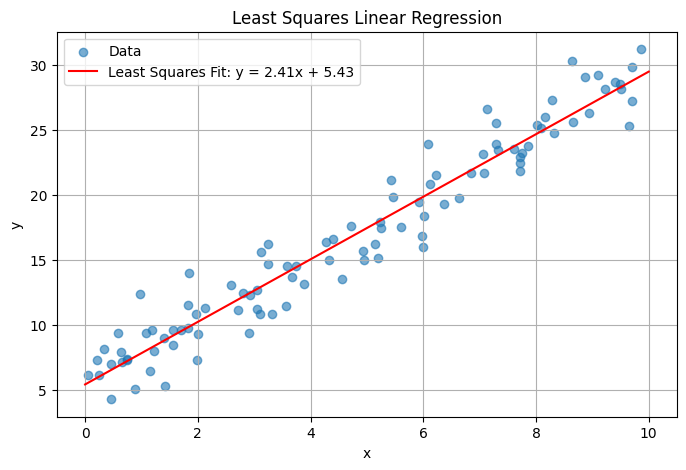

Estimated parameters:
θ₁ (slope)     = 2.41
θ₂ (intercept) = 5.43


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10
y = 2.5 * x + 5 + np.random.randn(100, 1) * 2  # true model: y = 2.5x + 5 + noise

# Construct design matrix X by adding a bias term (intercept)
X = np.hstack([x, np.ones_like(x)])  # shape: (100, 2)
# Closed-form solution: θ = (XᵗX)⁻¹ Xᵗy
theta_best = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract parameters
theta_1 = theta_best[0][0]  # slope
theta_2 = theta_best[1][0]  # intercept

# Make predictions for plotting
x_plot = np.linspace(0, 10, 100).reshape(-1, 1)
X_plot = np.hstack([x_plot, np.ones_like(x_plot)])
y_pred = X_plot @ theta_best

# Plot the data and fitted line
plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Data', alpha=0.6)
plt.plot(x_plot, y_pred, color='red', label=f'Least Squares Fit: y = {theta_1:.2f}x + {theta_2:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Output parameters
print(f"Estimated parameters:\nθ₁ (slope)     = {theta_1:.2f}\nθ₂ (intercept) = {theta_2:.2f}")


### Linear Regression

**Linear Regression** is a foundational supervised learning algorithm used to model the relationship between an input variable $x$ and an output variable $y$ by fitting a linear function.

---

###  Hypothesis Function

The model assumes a linear relationship:

$$
h_\theta(x) = \theta_1 x + \theta_2
$$

- $\theta_1$: slope (weight)
- $\theta_2$: intercept (bias)
- $\theta = (\theta_1, \theta_2)$ are the parameters to be learned

---

###  Loss Functions

Linear regression can be optimized using different norms to define the loss:

#### 1. **L2 Norm (Squared Loss / Least Squares)**

This is the most common loss function:

$$
\mathcal{L}(\hat{y}, y) = (\hat{y} - y)^2
$$

Over $m$ examples:

$$
J(\theta) = \sum_{i=1}^{m} (h_\theta(x_i) - y_i)^2
$$

- Sensitive to outliers
- Leads to a **smooth quadratic loss surface**, ideal for gradient-based optimization

#### 2. **L1 Norm (Absolute Error Loss)**

An alternative is the **L1 loss**:

$$
\mathcal{L}(\hat{y}, y) = |\hat{y} - y|
$$

Over $m$ examples:

$$
J(\theta) = \sum_{i=1}^{m} |h_\theta(x_i) - y_i|
$$

- More robust to outliers
- Leads to **sparse solutions** (used in Lasso regression)
- Loss surface is not differentiable at 0 → requires specialized optimization

---

###  Optimization Methods

- **Analytical solution**: available when using L2 norm and no regularization  
- **Gradient Descent**: used for large datasets or when no closed-form solution exists  
- **Regularization** can be added:
  - **L2 regularization** → Ridge Regression
  - **L1 regularization** → Lasso Regression

---

###  Summary

- **Model**: Linear  
- **Loss**: L2 norm (squared) or L1 norm (absolute)  
- **Optimization**: Analytical (L2), or iterative (GD, coordinate descent for L1)  
- **Regularization** improves generalization and controls overfitting

Linear regression is simple, interpretable, and forms the basis for more complex models like generalized linear models, ridge, lasso, and elastic net.


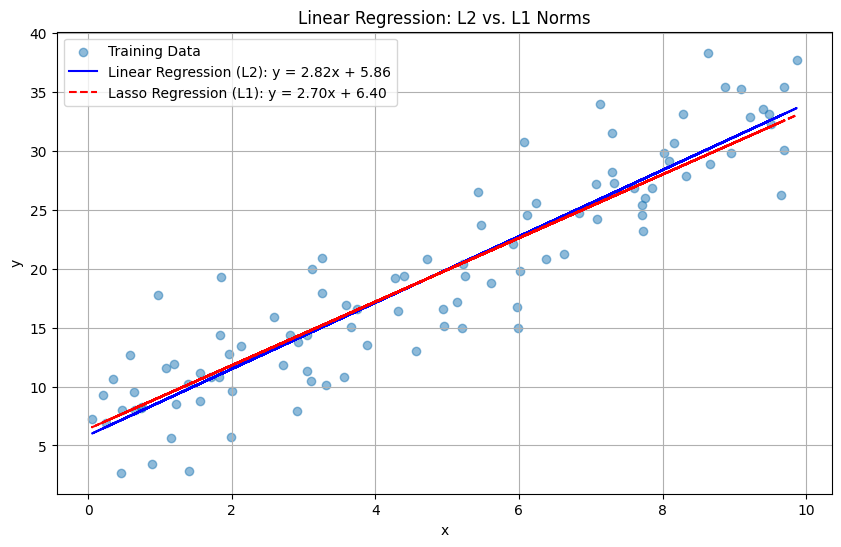

L2 Norm (Linear Regression):
  Slope (θ₁): 2.82
  Intercept (θ₂): 5.86

L1 Norm (Lasso Regression):
  Slope (θ₁): 2.70
  Intercept (θ₂): 6.40


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso

# Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10
y = 3 * x + 5 + np.random.randn(100, 1) * 4  # true model with noise

# Fit Linear Regression (L2 norm)
lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred_l2 = lr_model.predict(x)

# Fit Lasso Regression (L1 norm)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x, y)
y_pred_l1 = lasso_model.predict(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Training Data', alpha=0.5)
plt.plot(x, y_pred_l2, color='blue', label=f'Linear Regression (L2): y = {lr_model.coef_[0][0]:.2f}x + {lr_model.intercept_[0]:.2f}')
plt.plot(x, y_pred_l1, color='red', linestyle='--', label=f'Lasso Regression (L1): y = {lasso_model.coef_[0]:.2f}x + {lasso_model.intercept_[0]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: L2 vs. L1 Norms')
plt.legend()
plt.grid(True)
plt.show()

# Print parameters
print("L2 Norm (Linear Regression):")
print(f"  Slope (θ₁): {lr_model.coef_[0][0]:.2f}")
print(f"  Intercept (θ₂): {lr_model.intercept_[0]:.2f}")

print("\nL1 Norm (Lasso Regression):")
print(f"  Slope (θ₁): {lasso_model.coef_[0]:.2f}")
print(f"  Intercept (θ₂): {lasso_model.intercept_[0]:.2f}")


### Decision Trees

**Decision Trees** are non-parametric supervised learning models used for **classification** and **regression** tasks. They work by learning a hierarchy of **if-else rules** that split the data based on feature values.

---

###  Hypothesis Model

Unlike linear models that use a fixed mathematical function $h_\theta(x)$, decision trees use a **hierarchical structure** of decisions.

- Each internal node represents a **test condition** on a feature (e.g., $x_j < 5.2$)
- Each branch represents an outcome of the test
- Each leaf node assigns a **predicted label or value**

There is no explicit formula like $h_\theta(x) = \theta_1 x + \theta_2$, but the model predicts by **traversing the tree** based on input features.

---

###  Axis-Aligned Splits

- Decision boundaries are **axis-aligned**, meaning they split along one feature at a time
- Each node considers a single feature $x_j$ and a threshold $t$ such that:
  $$
  \text{Split condition: } x_j < t
  $$

These form **rectangular** partitions in the feature space.

---

### Loss / Impurity Functions

At each node, the tree tries to find the best feature and threshold to **minimize impurity** or **loss**:

- **For classification**:
  - **Gini Impurity**:
    $$
    G = 1 - \sum_{k=1}^K p_k^2
    $$
  - **Entropy**:
    $$
    H = - \sum_{k=1}^K p_k \log p_k
    $$

- **For regression**:
  - **Mean Squared Error**:
    $$
    \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2
    $$

---

### Optimization: Greedy Strategy

- Tree construction uses a **greedy algorithm**:
  - At each node, choose the best split that gives the most gain in purity or reduces loss the most
  - Do **not** backtrack or explore all combinations

- This is **not globally optimal**, but it's efficient and performs well in practice

---

### Summary

- **Model**: Hierarchical, interpretable, no explicit function form
- **Splits**: Axis-aligned, one feature at a time
- **Loss**: Classification (Gini/Entropy), Regression (MSE)
- **Optimization**: Greedy, recursive splitting

Decision trees are intuitive, interpretable, and form the basis of ensemble models like **Random Forests** and **Gradient Boosted Trees**.


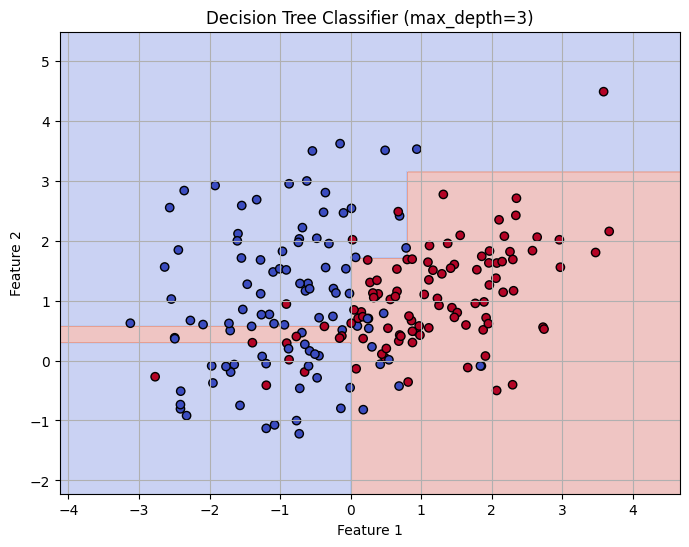

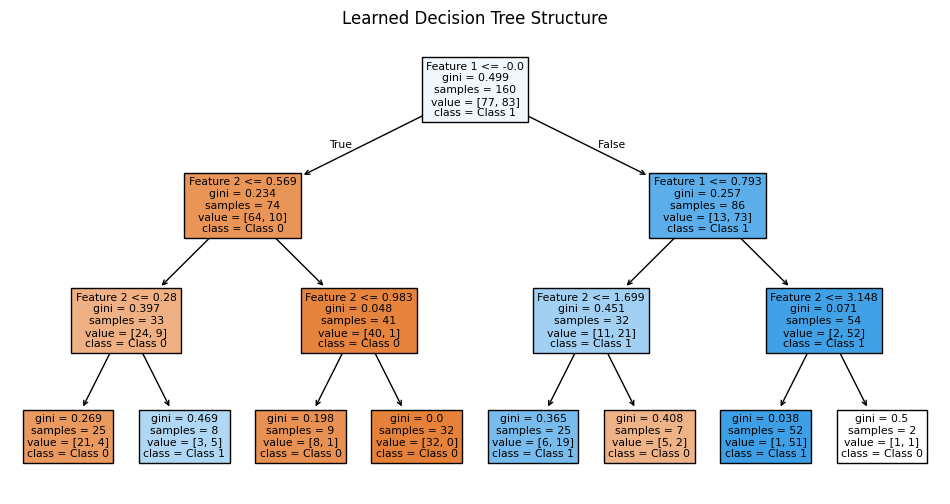

Test Accuracy: 0.82


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Generate synthetic classification data (2 features for easy plotting)
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("Decision Tree Classifier (max_depth=3)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

plot_decision_boundary(tree_clf, X, y)

# Plot the decision tree structure
plt.figure(figsize=(12, 6))
plot_tree(tree_clf, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], filled=True)
plt.title("Learned Decision Tree Structure")
plt.show()

# Accuracy on test data
accuracy = tree_clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


### Naive Bayes Classifier

**Naive Bayes** is a simple yet powerful probabilistic classifier based on **Bayes’ Theorem**, with a **naive assumption** that all features are conditionally independent given the class.

---

### Bayes' Theorem

Given a feature vector $x = (x_1, x_2, ..., x_n)$, we compute the posterior probability of class $y$ using:

$$
P(y \mid x) = \frac{P(x \mid y) \cdot P(y)}{P(x)}
$$

In classification, we don't need $P(x)$ since we only care about the most probable class:

$$
\hat{y} = \arg\max_y P(y \mid x) = \arg\max_y P(x \mid y) \cdot P(y)
$$

---

### Naive (Independence) Assumption

Naive Bayes assumes that all features $x_j$ are **conditionally independent** given the class $y$:

$$
P(x \mid y) = \prod_{j=1}^{n} P(x_j \mid y)
$$

This simplifies estimation and makes computation efficient — especially when using **counts** or frequencies from the training data.

---

### Hypothesis Function (Linear in Log Space)

The model chooses the class $y$ that maximizes the posterior:

$$
h_\theta(x) = \arg\max_y \ P(y) \prod_{j=1}^n P(x_j \mid y)
$$

Taking the logarithm (which preserves the order of probabilities):

$$
\log P(y \mid x) = \log P(y) + \sum_{j=1}^n \log P(x_j \mid y)
$$

This log-linear form shows that **Naive Bayes is linear in feature space**, similar to logistic regression, but derived from a probabilistic foundation.

---

### Training: Count-Based Estimation

- **$P(y)$** is estimated by class frequencies
- **$P(x_j \mid y)$** is estimated by feature frequencies **within each class**

For example, in text classification (e.g., spam detection), Naive Bayes counts how often each word appears in spam vs. non-spam messages.

---

### Summary

- **Model**: Probabilistic, based on Bayes' rule
- **Hypothesis**: $h_\theta(x) = \arg\max_y P(y) \prod_j P(x_j \mid y)$
- **Assumption**: Features are conditionally independent given the class
- **Training**: Based on frequency counts
- **Output**: Posterior probabilities or class label

Despite its simplicity, Naive Bayes is highly effective, especially for:
- Text classification
- Document categorization
- Sentiment analysis


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample SMS spam dataset
data = {
    'label': ['ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'ham'],
    'message': [
        "Hey, are we still meeting today?",
        "Congratulations! You've won a $1000 gift card. Call now!",
        "I'll call you later.",
        "Can you send the report by 5pm?",
        "WINNER! You just won a cruise to the Bahamas!",
        "You’ve been selected for a free prize. Reply YES!",
        "Don’t forget to attend the team meeting.",
        "URGENT! Your loan is approved. Click this link now!",
        "See you at lunch?",
        "Reminder: your doctor appointment is tomorrow at 10am."
    ]
}

df = pd.DataFrame(data)

# Step 1: Encode labels
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_encoded'], test_size=0.3, random_state=42)

# Step 3: Text preprocessing (Bag of Words)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 4: Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Step 5: Make predictions
y_pred = nb_model.predict(X_test_vec)

# Step 6: Evaluate
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

print(" Accuracy:", accuracy_score(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

 Accuracy: 0.6666666666666666


### Support Vector Machines (SVMs)

**Support Vector Machines (SVMs)** are powerful supervised learning models used for **binary classification** and **regression**, especially effective in high-dimensional spaces.

They aim to find a decision boundary that **maximizes the margin** between two classes.

---

###  Core Idea: Maximum Margin Classifier

Given training data points $(x_i, y_i)$ where $y_i \in \{-1, +1\}$, the SVM tries to find a **hyperplane** defined by:

$$
h_\theta(x) = w^T x + b
$$

such that:
- $w$ is the weight vector
- $b$ is the bias (offset)

The goal is to **maximize the margin** — the distance between the decision boundary and the nearest data points from each class (called **support vectors**).

---

### Loss Function: Hinge Loss

To allow some misclassifications (soft margin), SVMs minimize the **hinge loss**:

$$
\mathcal{L}(\hat{y}, y) = \max(0, 1 - y \cdot \hat{y})
$$

Where:
- $y \in \{-1, +1\}$
- $\hat{y} = w^T x + b$ (the model's raw output before applying sign)

This loss:
- Is **zero** when the prediction is correct and outside the margin
- Increases **linearly** when the prediction is wrong or within the margin

---

### Optimization Objective

SVM minimizes the **regularized hinge loss**:

$$
J(w, b) = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^m \max(0, 1 - y_i (w^T x_i + b))
$$

- First term $\frac{1}{2} \|w\|^2$: encourages a large margin (smaller $w$)
- Second term: total hinge loss across all training examples
- $C$: regularization parameter (controls tradeoff between margin size and classification error)

---

###  Kernels: Non-linear SVMs

If the data is **not linearly separable**, SVM uses a **kernel function** to map inputs into a higher-dimensional space where a linear separator **can** exist.

Common kernels:
- **Linear kernel**: $K(x, x') = x^T x'$
- **Polynomial kernel**: $K(x, x') = (x^T x' + c)^d$
- **RBF/Gaussian kernel**: $K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)$

SVM with a kernel function avoids explicitly computing the mapped features.

---

### Output and Decision Rule

SVM outputs a **signed score**:

$$
\hat{y} = \text{sign}(w^T x + b)
$$

- Output $\hat{y} = +1$ or $-1$
- Only the **sign** of the score matters, not its magnitude

---

### Summary

- **Model type**: Large-margin classifier  
- **Loss**: Hinge loss  
- **Output**: $\hat{y} = \pm1$ (sign of $w^T x + b$)  
- **Optimization**: Convex quadratic programming  
- **Kernel trick**: Enables non-linear decision boundaries

SVMs are robust, generalize well, and are widely used in text classification, image recognition, and bioinformatics.


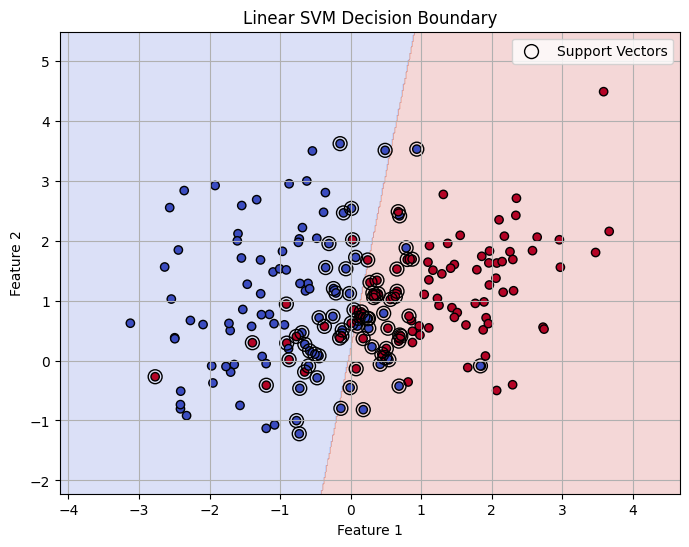

Model parameters:
  Weight vector (w): [ 1.36073068 -0.23358451]
  Bias (b): 0.05


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Step 1: Generate synthetic binary classification data (2D for plotting)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Convert labels from {0, 1} to {-1, +1} for SVM theory consistency
y_svm = np.where(y == 0, -1, 1)

# Step 2: Train a linear SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y_svm)

# Step 3: Plot decision boundary and support vectors
def plot_svm_decision_boundary(clf, X, y):
    plt.figure(figsize=(8, 6))

    # Create grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='black', label='Support Vectors')

    plt.title('Linear SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_svm_decision_boundary(clf, X, y_svm)

# Step 4: Print model parameters
w = clf.coef_[0]
b = clf.intercept_[0]
print(f"Model parameters:")
print(f"  Weight vector (w): {w}")
print(f"  Bias (b): {b:.2f}")


###  Neural Networks

**Neural Networks** are a class of **non-linear machine learning models** inspired by the human brain. They consist of layers of interconnected "neurons" that learn complex patterns in data through **layered transformations** and **backpropagation**.

---

###  Hypothesis Function

A neural network models a function $h_\theta(x)$ as a **composition of multiple non-linear functions**, typically written as:

$$
h_\theta(x) = f(x; \theta)
$$

Where:
- $x$ is the input vector  
- $\theta$ includes **all parameters**: weights and biases across layers  
- $f(\cdot)$ is a non-linear transformation built from **layers of neurons**

For example, a **simple 1-hidden-layer** network:

$$
h_\theta(x) = \sigma(W_2 \cdot \sigma(W_1 x + b_1) + b_2)
$$

- $W_1$, $W_2$: weight matrices  
- $b_1$, $b_2$: biases  
- $\sigma$: activation function (e.g., ReLU, sigmoid)

---

### Key Characteristics

- **Non-linear**: Activation functions introduce non-linearity  
- **Layered**: Networks consist of input, hidden, and output layers  
- **Universal approximators**: Can approximate any continuous function given enough neurons/layers

---

### 🔸 Loss Function

Neural networks are trained by minimizing a loss function $\mathcal{L}(\hat{y}, y)$:

- **Classification**: Cross-entropy loss  
  $$
  \mathcal{L}(\hat{y}, y) = - \sum y \log(\hat{y})
  $$
- **Regression**: Mean squared error (MSE)

---

### Optimization: Gradient Descent & SGD

Training is done using **gradient-based optimization**, typically:

1. **Gradient Descent (GD)**  
   - Update all parameters using the average gradient over the full dataset  
   - Slow for large datasets

2. **Stochastic Gradient Descent (SGD)**  
   - Update parameters using **one or a few examples at a time** (mini-batches)  
   - Faster convergence and better generalization

3. **Backpropagation** is used to efficiently compute gradients via the chain rule.

---

### Parameter Updates (SGD)

For each mini-batch, parameters $\theta$ are updated as:

$$
\theta \leftarrow \theta - \eta \cdot \nabla_\theta \mathcal{L}(\hat{y}, y)
$$

- $\eta$: learning rate  
- $\nabla_\theta \mathcal{L}$: gradient of the loss w.r.t. the parameters

---

### Summary

- **Model type**: Non-linear, multi-layered  
- **Function**: $h_\theta(x) = f(x; \theta)$  
- **Loss**: Depends on task (MSE, cross-entropy)  
- **Optimization**: Gradient Descent & Stochastic Gradient Descent  
- **Training**: Uses backpropagation to compute gradients efficiently

Neural networks form the foundation of **deep learning** and power modern applications like image recognition, natural language processing, and generative AI.


Epoch 0: Loss = 1.1590
Epoch 100: Loss = 0.5543
Epoch 200: Loss = 0.4358
Epoch 300: Loss = 0.3809
Epoch 400: Loss = 0.3505
Epoch 500: Loss = 0.3319
Epoch 600: Loss = 0.3198
Epoch 700: Loss = 0.3118
Epoch 800: Loss = 0.3064
Epoch 900: Loss = 0.3026

 Test Accuracy: 0.85


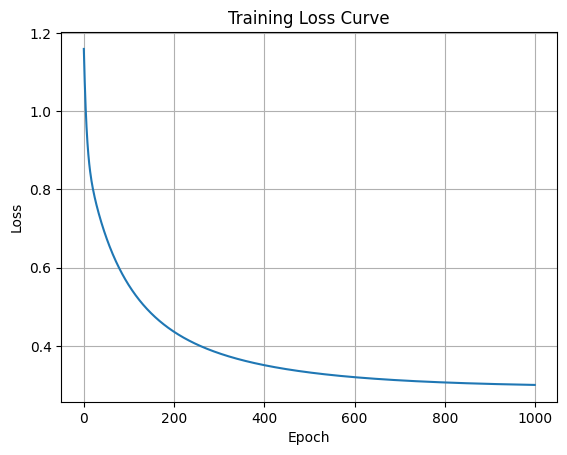

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate synthetic dataset (binary classification)
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # shape (n, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Step 2: Initialize parameters
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.1
epochs = 1000

np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Step 3: Training loop (SGD with full batch)
loss_history = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Compute loss (binary cross-entropy)
    m = y_train.shape[0]
    loss = -np.mean(y_train * np.log(A2 + 1e-8) + (1 - y_train) * np.log(1 - A2 + 1e-8))
    loss_history.append(loss)

    # Backpropagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X_train.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update weights
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Step 4: Prediction on test data
def predict(X):
    A1 = sigmoid(np.dot(X, W1) + b1)
    A2 = sigmoid(np.dot(A1, W2) + b2)
    return (A2 > 0.5).astype(int)

y_pred = predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {acc:.2f}")

# Step 5: Plot loss curve
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()
